In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from dark_emulator_public import dark_emulator
import os, sys, time, json, copy
import matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import simps
from tqdm import tqdm
import hsc3x2pt
import joblib

using dark_emulator at  /lustre/work/sunao.sugiyama/package/dark_emulator_public/dark_emulator/__init__.py


In [5]:
fishers_dict = od()

## Instantiate Fisher classes

### Year **1** single source bin

In [6]:
fisher1x2pt = joblib.load('FisherMats/single_source_ClY1IA/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/single_source_ClY1IA/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/single_source_ClY1IA/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01, 100, 100], # to avoid singular Fisher matrix of 2x2pt at A_IA param.
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm', 'A_IA', 'eta_IA'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph','dm'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm'], label='Prior')

fishers_dict['Y1IAsingle2x2pt'] = fisher2x2pt
fishers_dict['Y1IAsingle1x2pt'] = fisher1x2pt
fishers_dict['Y1IAsingle3x2pt'] = fisher3x2pt
fishers_dict['Y1IAsingle2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y1IAsingle1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y1IAsingle3x2ptPrior'] = fisher3x2ptPrior

### year 1 double source bins

In [7]:
fisher1x2pt = joblib.load('FisherMats/double_source_ClY1IA/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/double_source_ClY1IA/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/double_source_ClY1IA/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01, 100, 100], # to avoid singular Fisher matrix of 2x2p
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2', 'A_IA', 'eta_IA'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fishers_dict['Y1IAdouble2x2pt'] = fisher2x2pt
fishers_dict['Y1IAdouble1x2pt'] = fisher1x2pt
fishers_dict['Y1IAdouble3x2pt'] = fisher3x2pt
fishers_dict['Y1IAdouble2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y1IAdouble1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y1IAdouble3x2ptPrior'] = fisher3x2ptPrior

### Year 1 quadruple source bins

In [24]:
fisher1x2pt = joblib.load('FisherMats/quadruple_source_ClY1IA/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/quadruple_source_ClY1IA/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/quadruple_source_ClY1IA/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01, 100, 100], # to avoid singular Fisher matrix of 2x2p
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4', 'A_IA', 'eta_IA'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fishers_dict['Y1IAquadruple2x2pt'] = fisher2x2pt
fishers_dict['Y1IAquadruple1x2pt'] = fisher1x2pt
fishers_dict['Y1IAquadruple3x2pt'] = fisher3x2pt
fishers_dict['Y1IAquadruple2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y1IAquadruple1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y1IAquadruple3x2ptPrior'] = fisher3x2ptPrior

### Year **3** single source bin

In [25]:
fisher1x2pt = joblib.load('FisherMats/single_source_ClY3IA/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/single_source_ClY3IA/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/single_source_ClY3IA/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01, 100, 100], # to avoid singular Fisher matrix of 2x2pt at A_IA param.
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm', 'A_IA', 'eta_IA'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph','dm'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm'], label='Prior')

fishers_dict['Y3IAsingle2x2pt'] = fisher2x2pt
fishers_dict['Y3IAsingle1x2pt'] = fisher1x2pt
fishers_dict['Y3IAsingle3x2pt'] = fisher3x2pt
fishers_dict['Y3IAsingle2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3IAsingle1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3IAsingle3x2ptPrior'] = fisher3x2ptPrior

### year 3 double source bins

In [26]:
fisher1x2pt = joblib.load('FisherMats/double_source_ClY3IA/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/double_source_ClY3IA/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/double_source_ClY3IA/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01, 100, 100], # to avoid singular Fisher matrix of 2x2p
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2', 'A_IA', 'eta_IA'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fishers_dict['Y3IAdouble2x2pt'] = fisher2x2pt
fishers_dict['Y3IAdouble1x2pt'] = fisher1x2pt
fishers_dict['Y3IAdouble3x2pt'] = fisher3x2pt
fishers_dict['Y3IAdouble2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3IAdouble1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3IAdouble3x2ptPrior'] = fisher3x2ptPrior

### Year 3 quadruple source bins

In [27]:
fisher1x2pt = joblib.load('FisherMats/quadruple_source_ClY3IA/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/quadruple_source_ClY3IA/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/quadruple_source_ClY3IA/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01, 100, 100], # to avoid singular Fisher matrix of 2x2p
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4', 'A_IA', 'eta_IA'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fishers_dict['Y3IAquadruple2x2pt'] = fisher2x2pt
fishers_dict['Y3IAquadruple1x2pt'] = fisher1x2pt
fishers_dict['Y3IAquadruple3x2pt'] = fisher3x2pt
fishers_dict['Y3IAquadruple2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3IAquadruple1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3IAquadruple3x2ptPrior'] = fisher3x2ptPrior

## Plot

In [28]:
corner = hsc3x2pt.corner_class()

### 3x2pt: single vs double vs quadruple

Optimizing alpha of S8 to 0.29433827394707557
Optimizing alpha of S8 to 0.3599695285604198
Optimizing alpha of S8 to 0.37527206426302145
Optimizing alpha of S8 to 0.29433827394707557
Optimizing alpha of S8 to 0.3599695285604198
Optimizing alpha of S8 to 0.37527206426302145
Optimizing alpha of S8 to 0.29433827394707557
Optimizing alpha of S8 to 0.3599695285604198
Optimizing alpha of S8 to 0.37527206426302145
Optimizing alpha of S8 to 0.29433827394707557
Optimizing alpha of S8 to 0.3599695285604198
Optimizing alpha of S8 to 0.37527206426302145


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"3x2pt IA (Y3, 1bin) + Prior",0.05153,0.04751,0.04445,0.03536
"3x2pt IA (Y3, 2bin) + Prior",0.04040,0.03628,0.02455,0.02059
"3x2pt IA (Y3, 4bin) + Prior",0.03728,0.03366,0.01974,0.01608


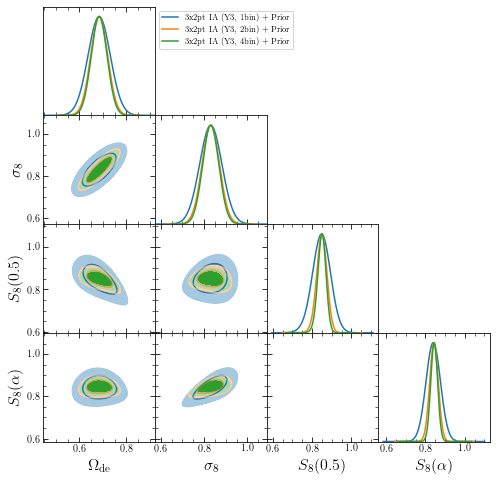

In [29]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle3x2ptPrior', 'Y3IAdouble3x2ptPrior', 'Y3IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8', 'S8opt'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3IAsingle3x2ptPrior_fY3IAdouble3x2ptPrior_fY3IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

Optimizing alpha of S8 to 0.3114247455703812
Optimizing alpha of S8 to 0.40726780977913374
Optimizing alpha of S8 to 0.3114247455703812
Optimizing alpha of S8 to 0.40726780977913374
Optimizing alpha of S8 to 0.3114247455703812
Optimizing alpha of S8 to 0.40726780977913374
Optimizing alpha of S8 to 0.3114247455703812
Optimizing alpha of S8 to 0.40726780977913374


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"3x2pt IA (Y1, 1bin) + Prior",0.06418,0.05270,0.05411,0.04656
"3x2pt IA (Y1, 2bin) + Prior",0.05567,0.04611,0.02838,0.02511


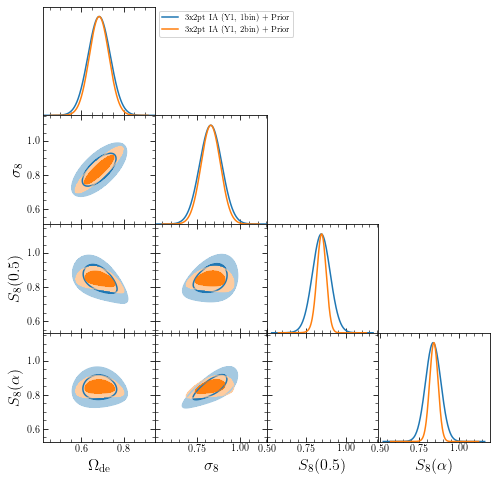

In [30]:
fishers = [fishers_dict[key] for key in ['Y1IAsingle3x2ptPrior', 'Y1IAdouble3x2ptPrior']]#, 'Y1IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8', 'S8opt'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY1IAsingle3x2ptPrior_fY1IAdouble3x2ptPrior_fY1IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

In [31]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle3x2ptPrior', 'Y3IAdouble3x2ptPrior', 'Y3IAquadruple3x2ptPrior']]
df = hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

print(df.to_latex(escape=False))

with open('figures/Y3IA_single_double_quadruple_table.tex', 'w') as f:
    f.write(df.to_latex(escape=False))
    
df

Optimizing alpha of S8 to 0.29433827394707557
Optimizing alpha of S8 to 0.3599695285604198
Optimizing alpha of S8 to 0.37527206426302145
\begin{tabular}{lllll}
\toprule
{} & $\sigma_8$ & $\Omega_\mathrm{de}$ & $S_8(0.5)$ & $S_8(\alpha)$ \\
\midrule
3x2pt IA (Y3, 1bin) + Prior &    0.05153 &              0.04751 &    0.04445 &       0.03536 \\
3x2pt IA (Y3, 2bin) + Prior &    0.04040 &              0.03628 &    0.02455 &       0.02059 \\
3x2pt IA (Y3, 4bin) + Prior &    0.03728 &              0.03366 &    0.01974 &       0.01608 \\
\bottomrule
\end{tabular}



,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"3x2pt IA (Y3, 1bin) + Prior",0.05153,0.04751,0.04445,0.03536
"3x2pt IA (Y3, 2bin) + Prior",0.04040,0.03628,0.02455,0.02059
"3x2pt IA (Y3, 4bin) + Prior",0.03728,0.03366,0.01974,0.01608


In [32]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle1x2ptPrior', 'Y3IAsingle2x2ptPrior','Y3IAsingle3x2ptPrior',
                                         'Y3IAdouble1x2ptPrior', 'Y3IAdouble2x2ptPrior', 'Y3IAdouble3x2ptPrior', 
                                         'Y3IAquadruple1x2ptPrior', 'Y3IAquadruple2x2ptPrior', 'Y3IAquadruple3x2ptPrior']]
df = hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

print(df.to_latex(escape=False))

with open('figures/Y3IA_single_double_quadruple_table_joint.tex', 'w') as f:
    f.write(df.to_latex(escape=False))
    
df

Optimizing alpha of S8 to 0.3451922967163653
Optimizing alpha of S8 to 0.552735205439332
Optimizing alpha of S8 to 0.29433827394707557
Optimizing alpha of S8 to 0.40889872681797684
Optimizing alpha of S8 to 0.5279053138279416
Optimizing alpha of S8 to 0.3599695285604198
Optimizing alpha of S8 to 0.3887017470134007
Optimizing alpha of S8 to 0.52790531382806
Optimizing alpha of S8 to 0.37527206426302145
\begin{tabular}{lllll}
\toprule
{} & $\sigma_8$ & $\Omega_\mathrm{de}$ & $S_8(0.5)$ & $S_8(\alpha)$ \\
\midrule
Cosmic Shear IA (Y3, 1bin) + Prior &    0.92162 &              1.01240 &    0.39756 &       0.39756 \\
2x2pt IA (Y3, 1bin) + Prior        &    0.11450 &              0.05875 &    0.07633 &       0.07633 \\
3x2pt IA (Y3, 1bin) + Prior        &    0.05153 &              0.04751 &    0.04445 &       0.03536 \\
Cosmic Shear IA (Y3, 2bin) + Prior &    0.09752 &              0.08744 &    0.03442 &       0.03060 \\
2x2pt IA (Y3, 2bin) + Prior        &    0.10195 &              0.05822 

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"Cosmic Shear IA (Y3, 1bin) + Prior",0.92162,1.01240,0.39756,0.39756
"2x2pt IA (Y3, 1bin) + Prior",0.11450,0.05875,0.07633,0.07633
"3x2pt IA (Y3, 1bin) + Prior",0.05153,0.04751,0.04445,0.03536
"Cosmic Shear IA (Y3, 2bin) + Prior",0.09752,0.08744,0.03442,0.03060
"2x2pt IA (Y3, 2bin) + Prior",0.10195,0.05822,0.06197,0.06197
"3x2pt IA (Y3, 2bin) + Prior",0.04040,0.03628,0.02455,0.02059
"Cosmic Shear IA (Y3, 4bin) + Prior",0.07049,0.06651,0.02626,0.01935
"2x2pt IA (Y3, 4bin) + Prior",0.10195,0.05822,0.06197,0.06197
"3x2pt IA (Y3, 4bin) + Prior",0.03728,0.03366,0.01974,0.01608


## 1x2pt vs 2x2pt vs 3x2pt in quadruple source bin

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"Cosmic Shear IA (Y3, 4bin) + Prior",0.07049,0.06651,0.02626
"2x2pt IA (Y3, 4bin) + Prior",0.10195,0.05822,0.06197
"3x2pt IA (Y3, 4bin) + Prior",0.03728,0.03366,0.01974


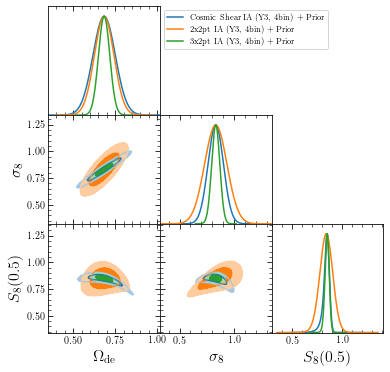

In [33]:
fishers = [fishers_dict[key] for key in ['Y3IAquadruple1x2ptPrior','Y3IAquadruple2x2ptPrior','Y3IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3IAquadruple1x2ptPrior_fY3IAquadruple2x2ptPrior_fY3IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"Cosmic Shear IA (Y1, 4bin) + Prior",0.11612,0.09894,0.03415
"2x2pt IA (Y1, 4bin) + Prior",0.13230,0.05940,0.09858
"3x2pt IA (Y1, 4bin) + Prior",0.05265,0.04379,0.02478


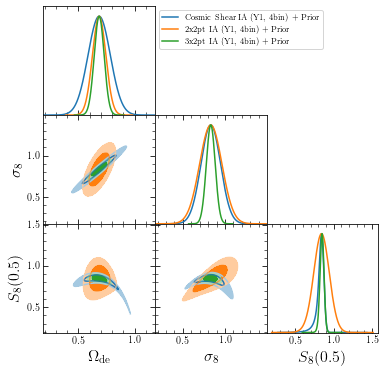

In [34]:
fishers = [fishers_dict[key] for key in ['Y1IAquadruple1x2ptPrior','Y1IAquadruple2x2ptPrior','Y1IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY1IAquadruple1x2ptPrior_fY1IAquadruple2x2ptPrior_fY1IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

## 1x2pt vs 2x2pt vs 3x2pt in double source bin

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"Cosmic Shear IA (Y3, 2bin) + Prior",0.09752,0.08744,0.03442
"2x2pt IA (Y3, 2bin) + Prior",0.10195,0.05822,0.06197
"3x2pt IA (Y3, 2bin) + Prior",0.04040,0.03628,0.02455


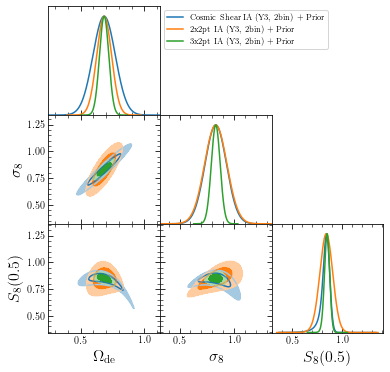

In [35]:
fishers = [fishers_dict[key] for key in ['Y3IAdouble1x2ptPrior','Y3IAdouble2x2ptPrior','Y3IAdouble3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3IAdouble1x2ptPrior_fY3IAdouble2x2ptPrior_fY3IAdouble3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"Cosmic Shear IA (Y1, 2bin) + Prior",0.16863,0.14000,0.05290
"2x2pt IA (Y1, 2bin) + Prior",0.13230,0.05940,0.09858
"3x2pt IA (Y1, 2bin) + Prior",0.05567,0.04611,0.02838


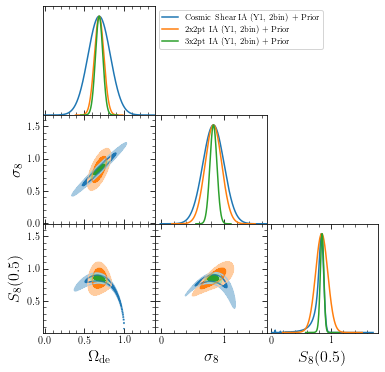

In [36]:
fishers = [fishers_dict[key] for key in ['Y1IAdouble1x2ptPrior','Y1IAdouble2x2ptPrior','Y1IAdouble3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY1IAdouble1x2ptPrior_fY1IAdouble2x2ptPrior_fY1IAdouble3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

In [37]:
1-(0.02059/0.03536)

0.41770361990950233

In [38]:
1-(0.01608/0.03536)

0.5452488687782806